## Data analysis of taxi routes in the city of Chicago  - Henry Thompson - Machine Learning - ESEIT

### Import libraries of interest for development

In [4]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_gbq
import matplotlib.pyplot as plt
#definir las rutasd de los directorios
from pathlib import Path
current_dir = Path(".").resolve()
project_dir=Path(current_dir).parent
                   


## Import data from the BigQuery repository

In [5]:
query = """SELECT * FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips` LIMIT 1000"""
df = pd.read_gbq(query)
df.head(5)

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,59f84d09b07552b9cdd61c841b8f4203be536a38,6fd459ffaac2670ce6a096faf040b54b265ba8e619befa...,2016-10-22 11:15:00+00:00,2016-10-22 11:30:00+00:00,1080,3.7,<NA>,<NA>,<NA>,<NA>,...,0.0,17.25,Credit Card,24 Seven Taxi,NaN,NaN,None,NaN,NaN,None
1,595b78b8256da9ee8556cdeb36aee0b7bc6cbef4,6fd459ffaac2670ce6a096faf040b54b265ba8e619befa...,2016-10-22 11:45:00+00:00,2016-10-22 11:45:00+00:00,480,1.4,<NA>,<NA>,<NA>,<NA>,...,0.0,7.50,Cash,24 Seven Taxi,NaN,NaN,None,NaN,NaN,None
2,5ca678f3e80fb5cf8f59016404686fd995daaedd,6fd459ffaac2670ce6a096faf040b54b265ba8e619befa...,2016-10-22 12:15:00+00:00,2016-10-22 12:30:00+00:00,1260,3.2,<NA>,<NA>,<NA>,<NA>,...,1.0,14.75,Cash,24 Seven Taxi,NaN,NaN,None,NaN,NaN,None
3,b073a32500edc07a1f9126280e95ffab907feabd,6fd459ffaac2670ce6a096faf040b54b265ba8e619befa...,2016-10-22 12:45:00+00:00,2016-10-22 13:00:00+00:00,840,1.7,<NA>,<NA>,<NA>,<NA>,...,0.0,9.50,Cash,24 Seven Taxi,NaN,NaN,None,NaN,NaN,None
4,398814abbc7b95f88f176eae27fd56dea26b78d0,6fd459ffaac2670ce6a096faf040b54b265ba8e619befa...,2016-10-22 13:45:00+00:00,2016-10-22 14:00:00+00:00,240,0.7,<NA>,<NA>,<NA>,<NA>,...,0.0,7.50,Credit Card,24 Seven Taxi,NaN,NaN,None,NaN,NaN,None


## Choose data type only numeric

In [6]:
numerics = ["int16", "int32","int64","float16","float32","float64"]
num_df = df.select_dtypes(include = numerics)
num_df.head()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,1080,3.7,<NA>,<NA>,<NA>,<NA>,13.75,3.0,0.0,0.0,17.25,NaN,NaN,NaN,NaN
1,480,1.4,<NA>,<NA>,<NA>,<NA>,7.50,0.0,0.0,0.0,7.50,NaN,NaN,NaN,NaN
2,1260,3.2,<NA>,<NA>,<NA>,<NA>,13.75,0.0,0.0,1.0,14.75,NaN,NaN,NaN,NaN
3,840,1.7,<NA>,<NA>,<NA>,<NA>,9.50,0.0,0.0,0.0,9.50,NaN,NaN,NaN,NaN
4,240,0.7,<NA>,<NA>,<NA>,<NA>,5.00,2.0,0.0,0.0,7.50,NaN,NaN,NaN,NaN


In [7]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trip_seconds            1000 non-null   Int64  
 1   trip_miles              1000 non-null   float64
 2   pickup_census_tract     0 non-null      Int64  
 3   dropoff_census_tract    0 non-null      Int64  
 4   pickup_community_area   0 non-null      Int64  
 5   dropoff_community_area  0 non-null      Int64  
 6   fare                    1000 non-null   float64
 7   tips                    1000 non-null   float64
 8   tolls                   1000 non-null   float64
 9   extras                  1000 non-null   float64
 10  trip_total              1000 non-null   float64
 11  pickup_latitude         0 non-null      float64
 12  pickup_longitude        0 non-null      float64
 13  dropoff_latitude        0 non-null      float64
 14  dropoff_longitude       0 non-null      f

## Choose columns of interest for development

In [8]:
df_tax = num_df.loc[:,["trip_seconds","trip_miles","fare","tips","extras","trip_total"]]

In [9]:
df_tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trip_seconds  1000 non-null   Int64  
 1   trip_miles    1000 non-null   float64
 2   fare          1000 non-null   float64
 3   tips          1000 non-null   float64
 4   extras        1000 non-null   float64
 5   trip_total    1000 non-null   float64
dtypes: Int64(1), float64(5)
memory usage: 48.0 KB


## Descritive statistics from Python

In [10]:
df_tax.describe()

,trip_seconds,trip_miles,fare,tips,extras,trip_total
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1058.094000,3.977670,13.431470,1.551330,0.812500,16.007800
std,4276.359997,5.646284,16.131165,2.728094,2.736253,18.944809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,360.000000,1.000000,6.250000,0.000000,0.000000,7.500000
50%,600.000000,1.700000,8.500000,0.000000,0.000000,10.250000
75%,960.000000,3.900000,13.250000,2.000000,1.000000,15.312500
max,86283.000000,48.400000,334.000000,25.050000,46.000000,334.000000


## Graph histogram and Boxplot for "trip_seconds"

<AxesSubplot:>

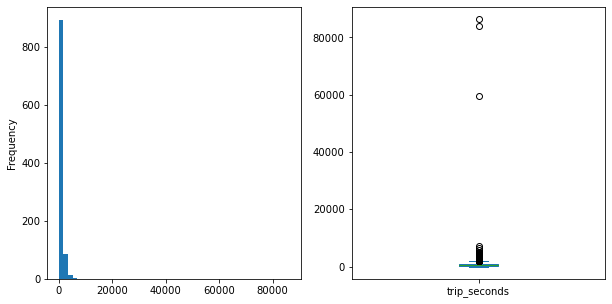

In [11]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (10,5))
df_tax["trip_seconds"].plot(kind = "hist", bins = 50, ax = ax[0])
df_tax["trip_seconds"].plot(kind = "box", ax = ax[1])
                       

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


FileNotFoundError: [Errno 2] No such file or directory: '/home/jupyter/ESEIT_BigData/reports/plots/taxi-trip-duration-chicago.png'

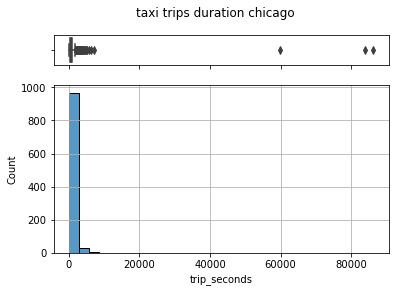

In [12]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(df_tax["trip_seconds"], ax=ax_box)
sns.histplot(data=df_tax, x="trip_seconds", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips duration chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trip-duration-chicago')
f.savefig(plot_path)

## Graph histogram and Boxplot for "trip_miles"

In [ ]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (10,5))
df_tax["trip_miles"].plot(kind = "hist", bins = 50, ax = ax[0])
df_tax["trip_miles"].plot(kind = "box", ax = ax[1])

In [ ]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(df_tax["trip_miles"], ax=ax_box)
sns.histplot(data=df_tax, x="trip_miles", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips duration chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trip-duration-chicago')
f.savefig(plot_path)

## Graph histogram and Boxplot for "fare"

<AxesSubplot:>

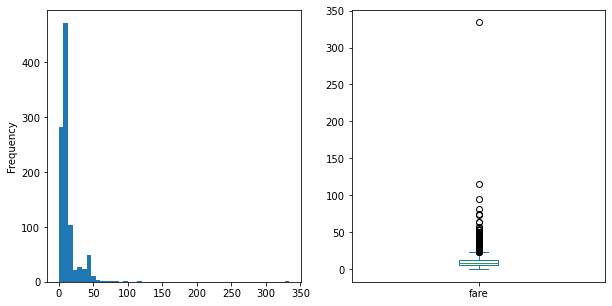

In [13]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (10,5))
df_tax["fare"].plot(kind = "hist", bins = 50, ax = ax[0])
df_tax["fare"].plot(kind = "box", ax = ax[1])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


FileNotFoundError: [Errno 2] No such file or directory: '/home/jupyter/ESEIT_BigData/reports/plots/taxi-trip-duration-chicago.png'

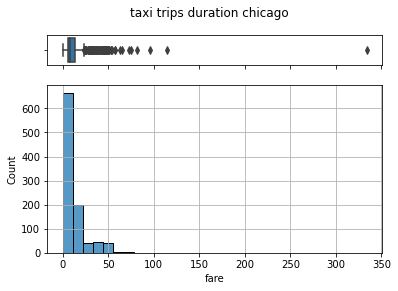

In [14]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(df_tax["fare"], ax=ax_box)
sns.histplot(data=df_tax, x="fare", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips duration chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trip-duration-chicago')
f.savefig(plot_path)

## Graph histogram and Boxplot for "tips"

In [ ]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (10,5))
df_tax["tips"].plot(kind = "hist", bins = 50, ax = ax[0])
df_tax["tips"].plot(kind = "box", ax = ax[1])

In [ ]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(df_tax["tips"], ax=ax_box)
sns.histplot(data=df_tax, x="tips", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips duration chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trip-duration-chicago')
f.savefig(plot_path)

## Graph histogram and Boxplot for "extras"

<AxesSubplot:>

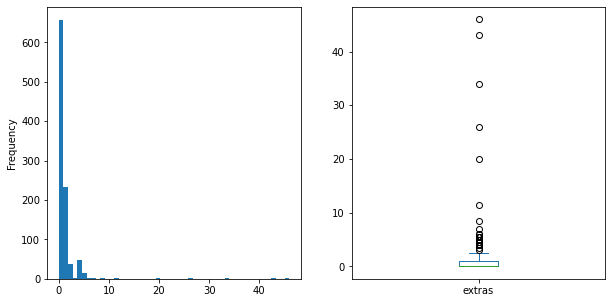

In [15]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (10,5))
df_tax["extras"].plot(kind = "hist", bins = 50, ax = ax[0])
df_tax["extras"].plot(kind = "box", ax = ax[1])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


FileNotFoundError: [Errno 2] No such file or directory: '/home/jupyter/ESEIT_BigData/reports/plots/taxi-trip-duration-chicago.png'

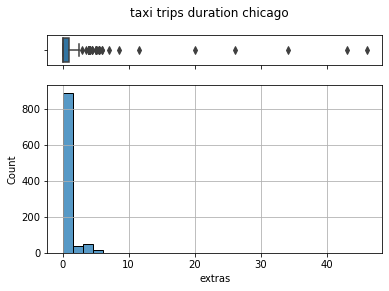

In [16]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(df_tax["extras"], ax=ax_box)
sns.histplot(data=df_tax, x="extras", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips duration chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trip-duration-chicago')
f.savefig(plot_path)

## Graph histogram and Boxplot for "trip_total"

In [ ]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (10,5))
df_tax["trip_total"].plot(kind = "hist", bins = 50, ax = ax[0])
df_tax["trip_total"].plot(kind = "box", ax = ax[1])

In [ ]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(df_tax["trip_total"], ax=ax_box)
sns.histplot(data=df_tax, x="trip_total", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips duration chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trip-duration-chicago')
f.savefig(plot_path)

##  Smoothing by logarithmic function  - logarithmic transfomation

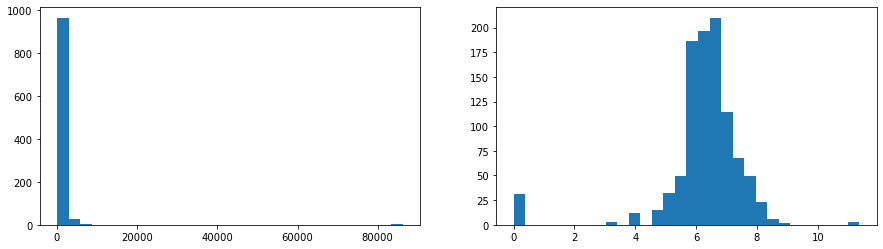

In [17]:
x = df_tax["trip_seconds"]
log_x = np.log(x+1)

f,ax = plt.subplots(1,2, figsize = (15,4))
ax[0].hist(x,bins = 30)
ax[1].hist(log_x,bins = 30);
                    
           

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_seconds'>

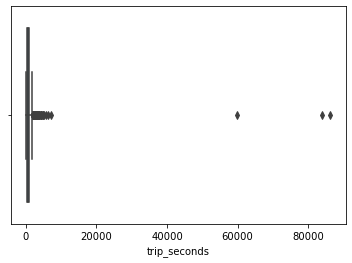

In [18]:
sns.boxplot(x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_seconds'>

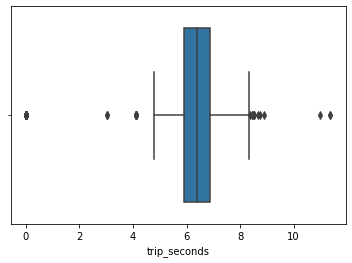

In [19]:
sns.boxplot(log_x)

In [20]:
log_x.describe()

count    1000.000000
mean        6.260855
std         1.388295
min         0.000000
25%         5.888878
50%         6.398595
75%         6.867974
max        11.365399
Name: trip_seconds, dtype: float64

## verifying original value

In [21]:
np.exp(log_x.mean())

523.6666794514106

<AxesSubplot:xlabel='trip_seconds', ylabel='trip_miles'>

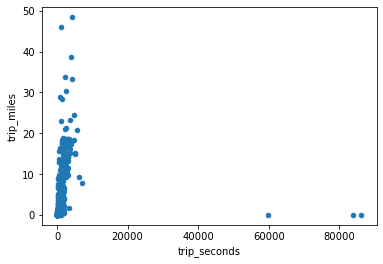

In [22]:
df_tax.plot(kind = "scatter", x ="trip_seconds", y = "trip_miles")

## Degrade data by intensity

(0.0, 10.0)

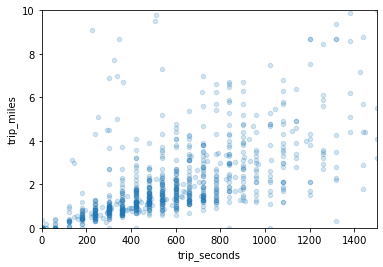

In [23]:
df_tax.plot(kind = "scatter", x ="trip_seconds", y = "trip_miles",alpha = 0.2)
plt.xlim(0,1500)
plt.ylim(0,10) # vertical limit

## Relationship of variables - correlation coefficient "trip_seconds" vs "trip_miles"

In [24]:
x = "trip_seconds"
y = "trip_miles"
df_tax[[x,y]].corr()

,trip_seconds,trip_miles
trip_seconds,1.000000,0.101143
trip_miles,0.101143,1.000000


<AxesSubplot:xlabel='trip_seconds', ylabel='trip_miles'>

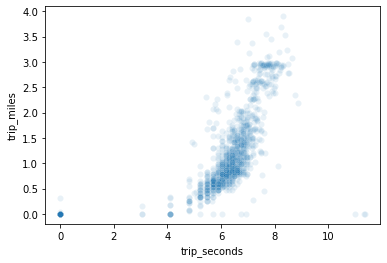

In [25]:
log_x = np.log(df_tax[x]+1)
log_y = np.log(df_tax[y]+1)

sns.scatterplot(x=log_x,y=log_y, alpha = 0.1)

## Create dataframe form with only logarithms

In [26]:
log_df_tax = pd.DataFrame(columns = [x,y])
log_df_tax[x] = log_x
log_df_tax[y] = log_y

log_df_tax.corr()

,trip_seconds,trip_miles
trip_seconds,1.000000,0.625779
trip_miles,0.625779,1.000000


## correlation coefficient "trip_seconds" vs "fare"

In [27]:
x = "trip_seconds"
y = "fare"
df_tax[[x,y]].corr()

,trip_seconds,fare
trip_seconds,1.000000,0.371775
fare,0.371775,1.000000


## correlation coefficient "trip_seconds" vs "tips"

In [28]:
x = "trip_seconds"
y = "tips"
df_tax[[x,y]].corr()

,trip_seconds,tips
trip_seconds,1.000000,0.053699
tips,0.053699,1.000000


## correlation coefficient "trip_seconds" vs "extras"

In [29]:
x = "trip_seconds"
y = "extras"
df_tax[[x,y]].corr()

,trip_seconds,extras
trip_seconds,1.000000,0.047396
extras,0.047396,1.000000


## correlation coefficient "trip_seconds" vs "trip_total"

In [62]:
x = "trip_seconds"
y = "trip_total"
df_tax[[x,y]].corr()

,trip_seconds,trip_total
trip_seconds,1.000000,0.330901
trip_total,0.330901,1.000000


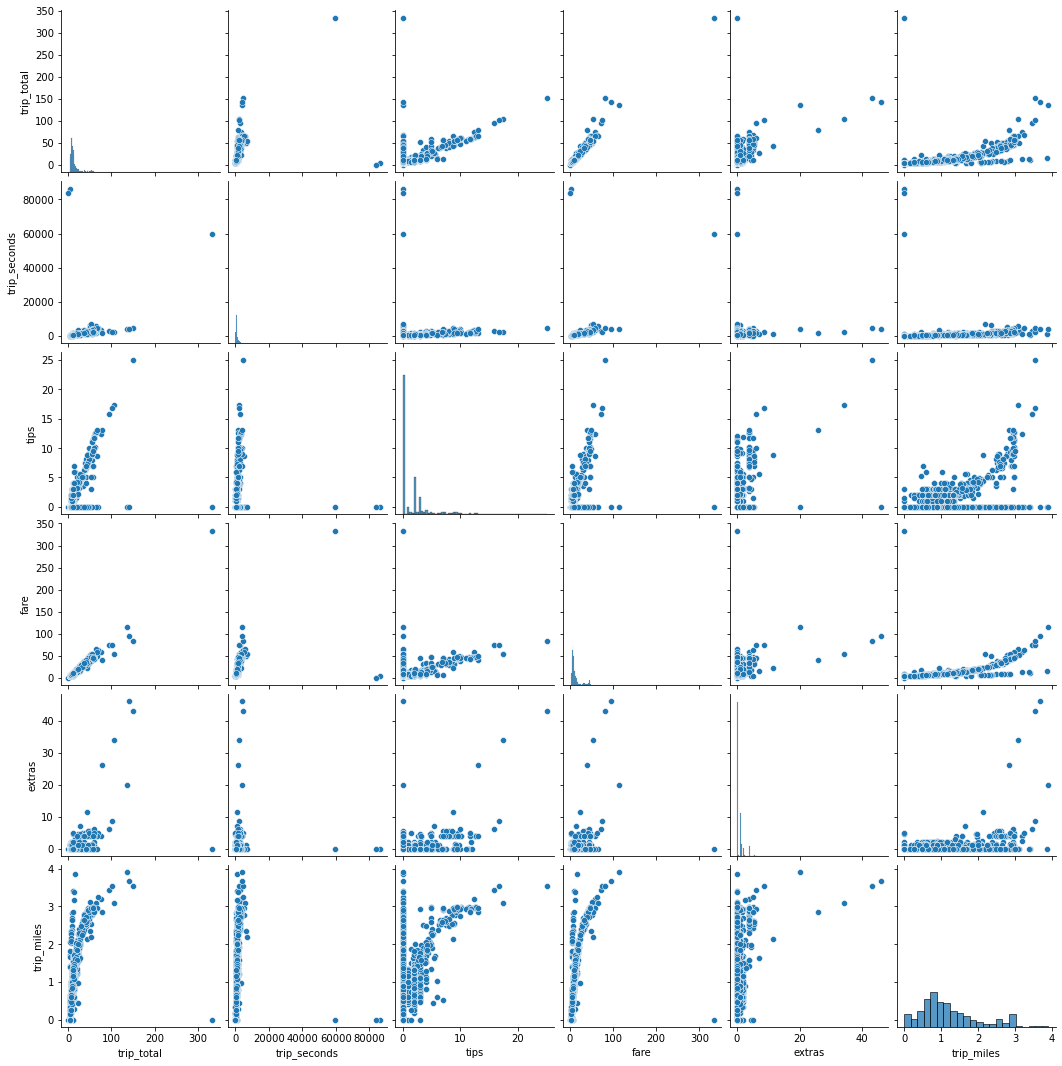

In [72]:
cols = ["trip_total","trip_seconds","tips","fare","extras","trip_miles"]
sns.pairplot (data = df_tax[cols]) # diagonal matrix

<AxesSubplot:>

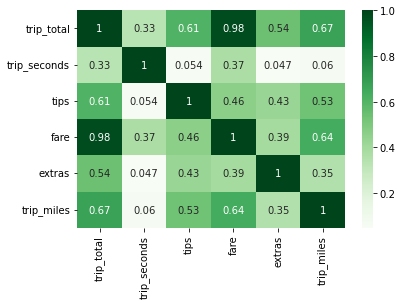

In [64]:
correlations = df_tax[cols].corr()
sns.heatmap (correlations, cmap = "Greens", annot = True)

## create dataframe with logarithmic values for each variable

In [65]:
tsec = df_tax["trip_seconds"]
tmil = df_tax["trip_miles"]
far  = df_tax["fare"]
tip  = df_tax["tips"]
ext  = df_tax["extras"]
ttot = df_tax["trip_total"]

df_tax["log_trip_seconds"] = np.log(tsec+1)
df_tax["log_trip_miles"]   = np.log(tmil+1)
df_tax["log_fare"]         = np.log(far+1)
df_tax["log_tips"]         = np.log(tip+1)
df_tax["log_extras"]       = np.log(ext+1)
df_tax["log_trip_total"]   = np.log(ttot+1)
df_tax

,trip_seconds,trip_miles,fare,tips,extras,trip_total,log_trip_seconds,log_trip_miles,log_fare,log_tips,log_extras,log_trip_total
0,1080,1.547563,13.75,3.0,0.0,17.25,6.985642,0.935137,2.691243,1.386294,0.000000,2.904165
1,480,0.875469,7.50,0.0,0.0,7.50,6.175867,0.628859,2.140066,0.000000,0.000000,2.140066
2,1260,1.435085,13.75,0.0,1.0,14.75,7.13966,0.889981,2.691243,0.000000,0.693147,2.756840
3,840,0.993252,9.50,0.0,0.0,9.50,6.734592,0.689767,2.351375,0.000000,0.000000,2.351375
4,240,0.530628,5.00,2.0,0.0,7.50,5.484797,0.425678,1.791759,1.098612,0.000000,2.140066
...,...,...,...,...,...,...,...,...,...,...,...,...
995,720,0.875469,8.00,0.0,1.0,9.00,6.580639,0.628859,2.197225,0.000000,0.693147,2.302585
996,660,1.163151,9.00,0.0,2.0,11.00,6.493754,0.771566,2.302585,0.000000,1.098612,2.484907
997,540,0.832909,7.25,2.0,0.0,9.75,6.293419,0.605904,2.110213,1.098612,0.000000,2.374906
998,1140,2.001480,19.75,2.2,1.0,23.45,7.03966,1.099106,3.032546,1.163151,0.693147,3.196630


## select only logarithmic columns

In [68]:
df_tax_log = df_tax.loc[:,["log_trip_seconds","log_trip_miles","log_fare","log_tips","log_extras","log_trip_total"]]
df_tax_log

,log_trip_seconds,log_trip_miles,log_fare,log_tips,log_extras,log_trip_total
0,6.985642,0.935137,2.691243,1.386294,0.000000,2.904165
1,6.175867,0.628859,2.140066,0.000000,0.000000,2.140066
2,7.13966,0.889981,2.691243,0.000000,0.693147,2.756840
3,6.734592,0.689767,2.351375,0.000000,0.000000,2.351375
4,5.484797,0.425678,1.791759,1.098612,0.000000,2.140066
...,...,...,...,...,...,...
995,6.580639,0.628859,2.197225,0.000000,0.693147,2.302585
996,6.493754,0.771566,2.302585,0.000000,1.098612,2.484907
997,6.293419,0.605904,2.110213,1.098612,0.000000,2.374906
998,7.03966,1.099106,3.032546,1.163151,0.693147,3.196630


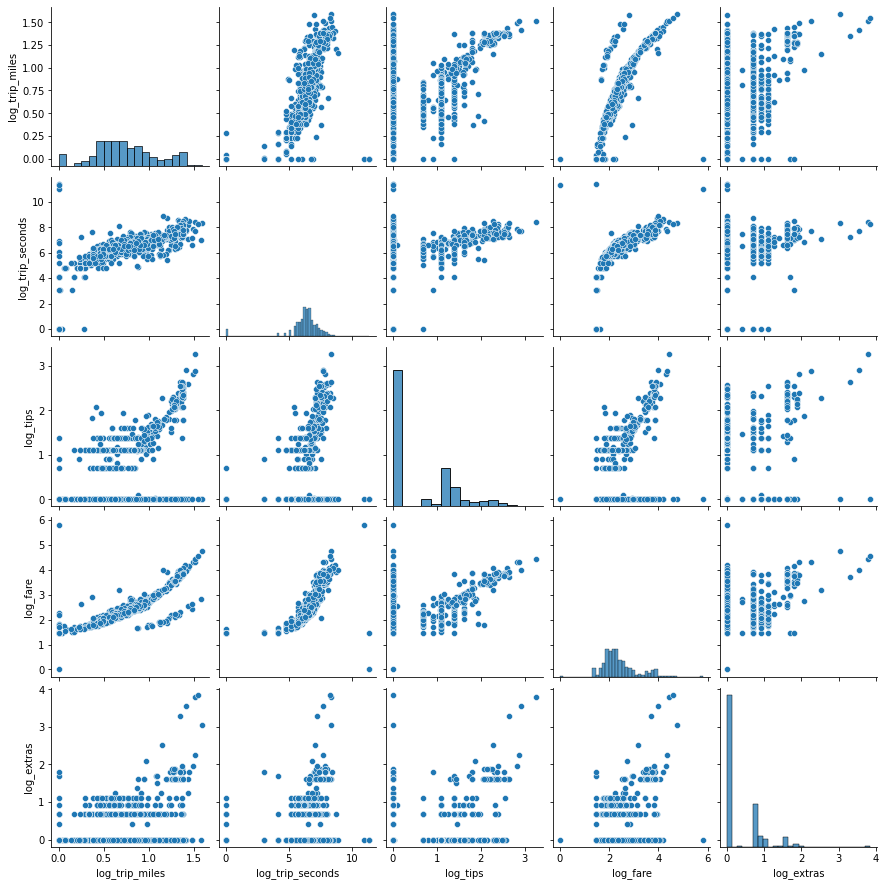

In [75]:
cols = ["log_trip_miles","log_trip_seconds","log_tips","log_fare","log_extras"]
sns.pairplot (data = df_tax_log[cols]) # diagonal matrix

<AxesSubplot:>

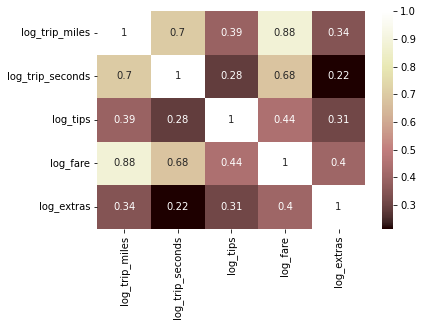

In [77]:
correlations = df_tax_log[cols].corr()
sns.heatmap (correlations, cmap = "pink", annot = True)

## MinMax Scaler and Standard Scaler charts "trip_seconds"

In [78]:
x = df_tax["trip_seconds"]
x_min = x.min()
x_max = x.max()

print(x)
print(x_min)
print(x_max)

0      1080
1       480
2      1260
3       840
4       240
       ... 
995     720
996     660
997     540
998    1140
999     480
Name: trip_seconds, Length: 1000, dtype: Int64
0
86283


In [79]:
x_scaled = (x-x_min)/(x_max-x_min)

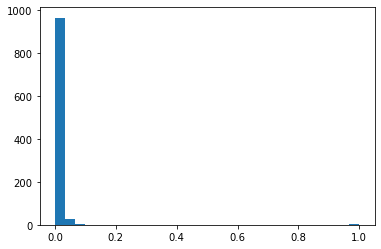

In [83]:
plt.hist(x_scaled,bins = 30);

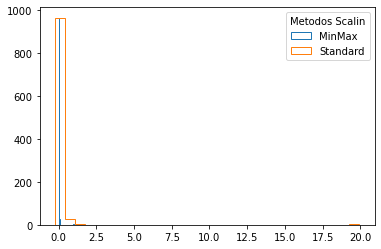

In [84]:
x = df_tax['trip_seconds']
media = x.mean()
desviacion_estandar = x.std()
x_std_scaler = (x-media)/desviacion_estandar

plt.hist(x_scaled, bins=30, label='MinMax', histtype='step', lw=1);
plt.hist(x_std_scaler, bins=30, label='Standard', histtype='step', lw=1);

plt.legend(title='Metodos Scalin')

#En standar, la media de ubica en cero

In [85]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [86]:
scaler = MinMaxScaler() # modelo
min_max_scaler = scaler.fit(df_tax[cols]) # entrenamiento del modelo
data_min_max_scaler= min_max_scaler.transform(df_tax[cols]) # transformación de datos

print(data_min_max_scaler)

[[0.58842327 0.61464112 0.42524135 0.46287971 0.        ]
 [0.39570142 0.54339201 0.         0.36808017 0.        ]
 [0.5600097  0.62819264 0.         0.46287971 0.18003133]
 ...
 [0.38125776 0.55373498 0.3369958  0.36294562 0.        ]
 [0.69159838 0.61939401 0.35679278 0.52158207 0.18003133]
 [0.52637323 0.54339201 0.3369958  0.40847135 0.        ]]


In [89]:
num_df_minmax_scaled = pd.DataFrame(columns=df_tax[cols].columns, data=data_min_max_scaler)
num_df_minmax_scaled.head()

,log_trip_miles,log_trip_seconds,log_tips,log_fare,log_extras
0,0.588423,0.614641,0.425241,0.462880,0.000000
1,0.395701,0.543392,0.000000,0.368080,0.000000
2,0.560010,0.628193,0.000000,0.462880,0.180031
3,0.434027,0.592552,0.000000,0.404424,0.000000
4,0.267853,0.482587,0.336996,0.308173,0.000000


## MinMax Scaler and Standard Scaler charts "trip_miles"

In [96]:
x = df_tax["trip_miles"]
x_min = x.min()
x_max = x.max()

print(x)
print(x_min)
print(x_max)

0      1.547563
1      0.875469
2      1.435085
3      0.993252
4      0.530628
         ...   
995    0.875469
996    1.163151
997    0.832909
998    2.001480
999    1.308333
Name: trip_miles, Length: 1000, dtype: float64
0.0
3.899950424193877


In [97]:
x_scaled = (x-x_min)/(x_max-x_min)

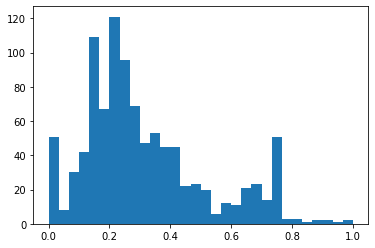

In [98]:
plt.hist(x_scaled,bins = 30);

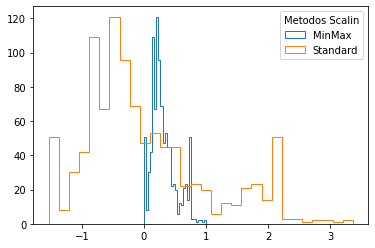

In [99]:
x = df_tax['trip_miles']
media = x.mean()
desviacion_estandar = x.std()
x_std_scaler = (x-media)/desviacion_estandar

plt.hist(x_scaled, bins=30, label='MinMax', histtype='step', lw=1);
plt.hist(x_std_scaler, bins=30, label='Standard', histtype='step', lw=1);

plt.legend(title='Metodos Scalin')

#En standar, la media de ubica en cero

## MinMax Scaler and Standard Scaler charts "tips"

In [104]:
x = df_tax["tips"]
x_min = x.min()
x_max = x.max()

print(x)
print(x_min)
print(x_max)

0      3.0
1      0.0
2      0.0
3      0.0
4      2.0
      ... 
995    0.0
996    0.0
997    2.0
998    2.2
999    2.0
Name: tips, Length: 1000, dtype: float64
0.0
25.05


In [105]:
x_scaled = (x-x_min)/(x_max-x_min)

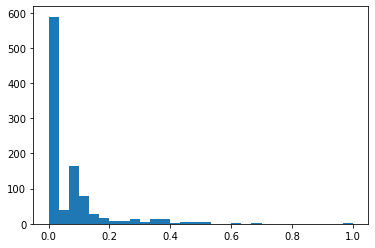

In [106]:
plt.hist(x_scaled,bins = 30);

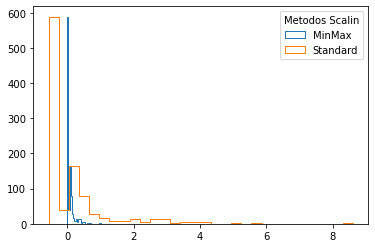

In [107]:
x = df_tax['tips']
media = x.mean()
desviacion_estandar = x.std()
x_std_scaler = (x-media)/desviacion_estandar

plt.hist(x_scaled, bins=30, label='MinMax', histtype='step', lw=1);
plt.hist(x_std_scaler, bins=30, label='Standard', histtype='step', lw=1);

plt.legend(title='Metodos Scalin')

#En standar, la media de ubica en cero

## MinMax Scaler and Standard Scaler charts "fare"

In [113]:
x = df_tax["fare"]
x_min = x.min()
x_max = x.max()

print(x)
print(x_min)
print(x_max)

0      13.75
1       7.50
2      13.75
3       9.50
4       5.00
       ...  
995     8.00
996     9.00
997     7.25
998    19.75
999     9.75
Name: fare, Length: 1000, dtype: float64
0.0
334.0


In [114]:
x_scaled = (x-x_min)/(x_max-x_min)

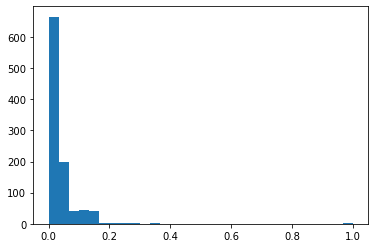

In [115]:
plt.hist(x_scaled,bins = 30);

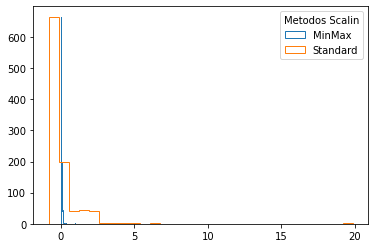

In [116]:
x = df_tax['fare']
media = x.mean()
desviacion_estandar = x.std()
x_std_scaler = (x-media)/desviacion_estandar

plt.hist(x_scaled, bins=30, label='MinMax', histtype='step', lw=1);
plt.hist(x_std_scaler, bins=30, label='Standard', histtype='step', lw=1);

plt.legend(title='Metodos Scalin')

#En standar, la media de ubica en cero

## MinMax Scaler and Standard Scaler charts "extras"

In [117]:
x = df_tax["extras"]
x_min = x.min()
x_max = x.max()

print(x)
print(x_min)
print(x_max)

0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
995    1.0
996    2.0
997    0.0
998    1.0
999    0.0
Name: extras, Length: 1000, dtype: float64
0.0
46.0


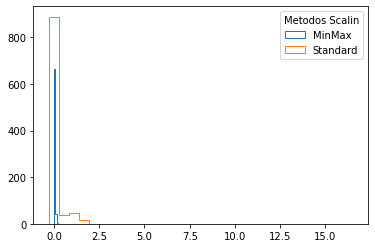

In [118]:
x = df_tax['extras']
media = x.mean()
desviacion_estandar = x.std()
x_std_scaler = (x-media)/desviacion_estandar

plt.hist(x_scaled, bins=30, label='MinMax', histtype='step', lw=1);
plt.hist(x_std_scaler, bins=30, label='Standard', histtype='step', lw=1);

plt.legend(title='Metodos Scalin')

#En standar, la media de ubica en cero